<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/Solving_Loan_Prediction_problem_using_Neural_Network_June6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 1.2.2


In [50]:
# loading the pre-processed dataset
data = pd.read_csv('/loan_prediction_data.csv')

In [51]:
# looking at the first five rows of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [52]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [53]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [54]:
# looking at the shape of the data
data.shape

(614, 12)

In [55]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [56]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [57]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [58]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

In [59]:
# checking the version of keras
import keras
print(keras.__version__)

2.15.0


In [ ]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### a. Create a model

<img src='https://drive.google.com/uc?id=1iZNZ3kwSHRNf-Irn3DZmMuBb6K-Lro7w'>

In [14]:
# importing the sequential model
from keras.models import Sequential

### b. Defining different layers

<img src='https://drive.google.com/uc?id=16X6De2hua1XJBe3dfmUUeGTgP6PbXEpc'>

In [15]:
# importing different layers from keras
from keras.layers import InputLayer, Dense

<img src='https://drive.google.com/uc?id=1tsy4B6G0UN4-J4L4roOdoWQiZMUdgw2a'>

In [16]:
# number of input neurons
X_train.shape

(491, 11)

In [17]:
# number of features in the data
X_train.shape[1]

11

In [18]:
# defining input neurons
input_neurons = X_train.shape[1]

<img src='https://drive.google.com/uc?id=1xL_hM9rGItZjsZ8Lofwzw_9fZUi4bgJo'>

In [ ]:
# number of output neurons

# since loan prediction is a binary classification problem, we will have single neuron in the output layer

In [19]:
# define number of output neurons
output_neurons = 1

In [ ]:
# number of hidden layers and hidden neurons

# It is a hyperparameter and we can pick the hidden layers and hidden neurons on our own

In [20]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [ ]:
# activation function of different layers

# for now I have picked relu as an activation function for hidden layers, you can change it as well
# since it is a binary classification problem, I have used sigmoid activation function in the final layer

In [21]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [22]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
from keras import Input, Model
from keras.models import Sequential
from keras.layers import InputLayer, Dense, concatenate

In [62]:
X_train.shape

(491, 11)

In [64]:
X_train.shape[1]

11

In [65]:
input_neurons = X_train.shape[1]

In [66]:
output_neurons = 1

In [70]:
number_of_hidden_layers = 2
neuron_hidden_layer_1_1 = 10
neuron_hidden_layer_1_2 = 10
neuron_hidden_layer_2 = 5

In [71]:
x = Input(shape=(input_neurons,))
hidden1_1 = Dense(units=neuron_hidden_layer_1_1, activation='relu')(x)
hidden1_2 = Dense(units=neuron_hidden_layer_1_2, activation='relu')(x)

combined = concatenate([hidden1_1, hidden1_2])

hidden2 = Dense(units=neuron_hidden_layer_2, activation='relu')(combined)
output = Dense(units=output_neurons, activation='sigmoid')(hidden2)

model_functional = Model(x, output)

In [72]:
model_functional.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 11)]                 0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 10)                   120       ['input_5[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 10)                   120       ['input_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 20)                   0         ['dense_6[0][0]',             
                                                                     'dense_7[0][0]']       

In [73]:
model_functional.compile(loss='binary_crossentropy', optimizer = 'Adam',metrics = ['accuracy'])

In [74]:
model_history = model_functional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 5s 44ms/step - loss: 0.6895 - accuracy: 0.6253 - val_loss: 0.6840 - val_accuracy: 0.6504
Epoch 2/50
16/16 [==============================] - 0s 18ms/step - loss: 0.6749 - accuracy: 0.6986 - val_loss: 0.6651 - val_accuracy: 0.6585
Epoch 3/50
16/16 [==============================] - 0s 23ms/step - loss: 0.6585 - accuracy: 0.7047 - val_loss: 0.6475 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 22ms/step - loss: 0.6416 - accuracy: 0.7026 - val_loss: 0.6298 - val_accuracy: 0.7154
Epoch 5/50
16/16 [==============================] - 0s 12ms/step - loss: 0.6261 - accuracy: 0.7006 - val_loss: 0.6102 - val_accuracy: 0.7154
Epoch 6/50
16/16 [==============================] - 0s 15ms/step - loss: 0.6099 - accuracy: 0.6965 - val_loss: 0.5911 - val_accuracy: 0.7154
Epoch 7/50
16/16 [==============================] - 0s 15ms/step - loss: 0.5944 - accuracy: 0.7149 - val_loss: 0.5768 - val_accuracy: 0.7236
Epoch 8/50
16

In [75]:
prediction = model_functional.predict(X_test)

4/4 [==============================] - 0s 8ms/step


In [76]:
prediction = prediction.reshape(123,)

In [77]:
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(int)


In [78]:
accuracy_score(y_test,prediction_int)

0.8130081300813008

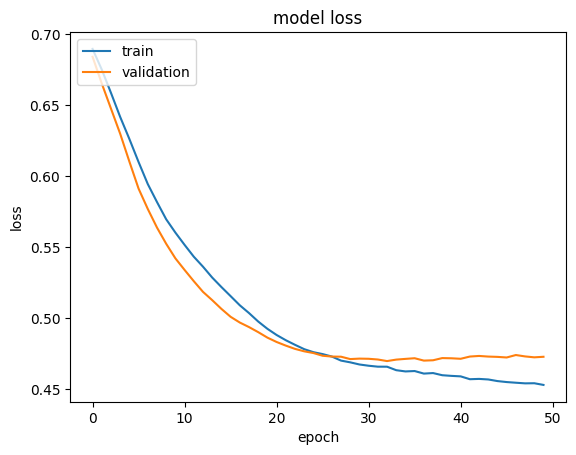

In [79]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



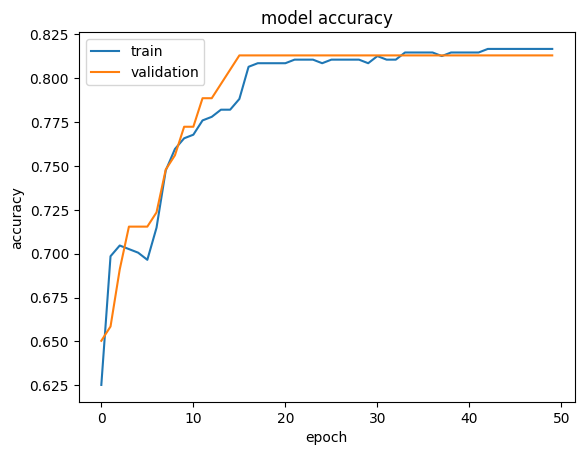

In [80]:
# summarize history for loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [35]:
x = Input(shape=(input_neurons,))
hidden1 = Dense(units=neuron_hidden_layer_1, activation='relu')(x)
hidden2 = Dense(units=neuron_hidden_layer_2, activation='relu')(hidden1)
output = Dense(units=output_neurons, activation='sigmoid')(hidden2)

model_functional = Model(x, output)

In [36]:
model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model_functional.compile(loss='binary_crossentropy', optimizer = 'Adam',metrics = ['accuracy'])

In [40]:
model_history = model_functional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 1s 16ms/step - loss: 0.6377 - accuracy: 0.6660 - val_loss: 0.6388 - val_accuracy: 0.6667
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6192 - accuracy: 0.6721 - val_loss: 0.6239 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6055 - accuracy: 0.6864 - val_loss: 0.6110 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5950 - accuracy: 0.6864 - val_loss: 0.6014 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5883 - accuracy: 0.6864 - val_loss: 0.5943 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5819 - accuracy: 0.6864 - val_loss: 0.5880 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5759 - accuracy: 0.6864 - val_loss: 0.5812 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

In [41]:
prediction = model_functional.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [43]:
prediction = prediction.reshape(123,)

In [45]:
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(int)

In [47]:
accuracy_score(y_test,prediction_int)

0.8130081300813008

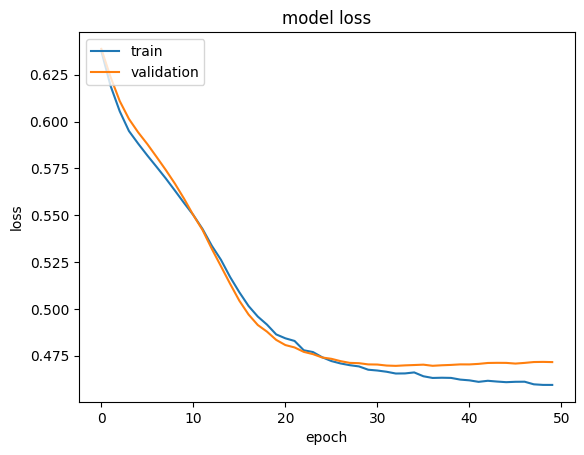

In [48]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

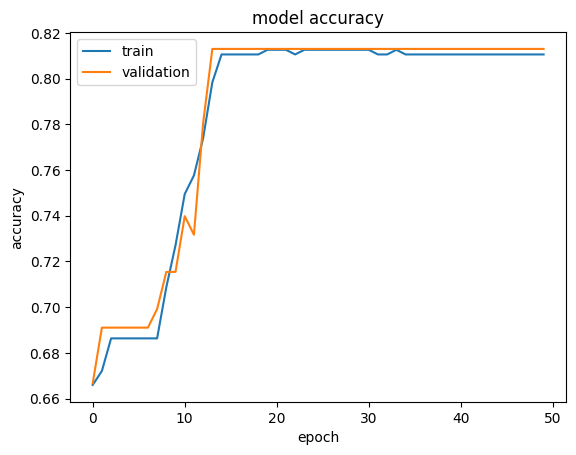

In [49]:
# summarize history for loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
# number of parameters between input and first hidden layer

input_neurons*neuron_hidden_layer_1

110

In [24]:
# number of parameters between input and first hidden layer

# adding the bias for each neuron of first hidden layer

input_neurons*neuron_hidden_layer_1 + 10

120

In [25]:
# number of parameters between first and second hidden layer

neuron_hidden_layer_1*neuron_hidden_layer_2 + 5

55

In [26]:
# number of parameters between second hidden and output layer

neuron_hidden_layer_2*output_neurons + 1

6

## 4. Compiling the model (defining loss function, optimizer)

In [27]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 5. Training the model

In [28]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 4s 29ms/step - loss: 0.7356 - accuracy: 0.3340 - val_loss: 0.7248 - val_accuracy: 0.3577
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 0.7103 - accuracy: 0.3809 - val_loss: 0.6997 - val_accuracy: 0.4065
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6906 - accuracy: 0.5845 - val_loss: 0.6800 - val_accuracy: 0.6098
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.6751 - accuracy: 0.6741 - val_loss: 0.6662 - val_accuracy: 0.6748
Epoch 5/50
16/16 [==============================] - 0s 13ms/step - loss: 0.6642 - accuracy: 0.6823 - val_loss: 0.6531 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 10ms/step - loss: 0.6525 - accuracy: 0.6864 - val_loss: 0.6439 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 11ms/step - loss: 0.6436 - accuracy: 0.6864 - val_loss: 0.6355 - val_accuracy: 0.6911
Epoch 8/50
16/16

## 6. Evaluating model performance on validation set

In [30]:
# getting predictions for the validation set
#prediction = model.predict_classes(X_test)
prediction = np.where(model.predict(X_test) < 0.5, 0, 1)

4/4 [==============================] - 0s 3ms/step


In [31]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction)

0.8130081300813008

### Visualizing the model performance

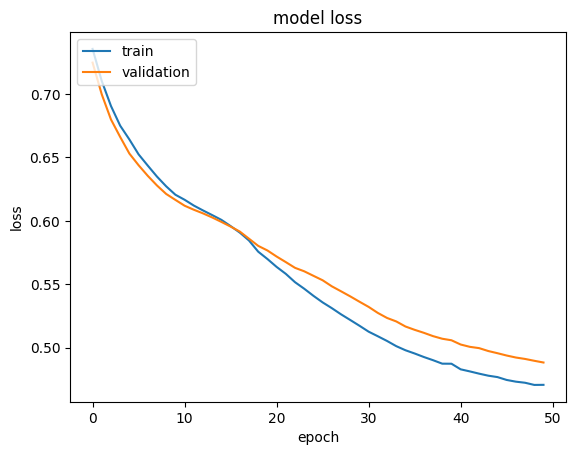

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

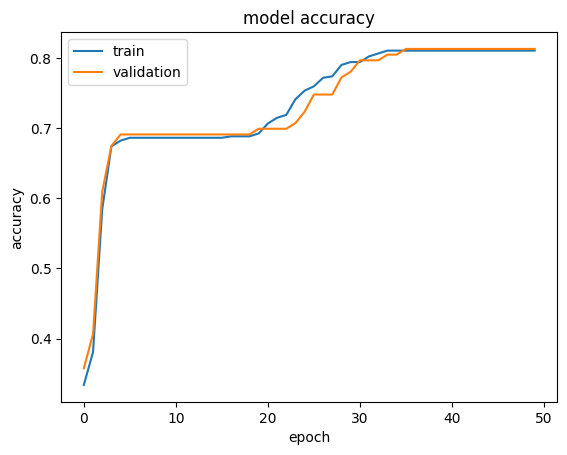

In [33]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()